# Fire outbreak detection
The goal of this project is to provide a service for fire outbreak detection using basic information

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from datetime import datetime
%matplotlib inline

# Retrieve the credentials for MS Vision API
api_credentials = np.load('api_credentials.npy').item()
classif_setup = {'project_id': '3b413cb2-f48f-485b-a8cf-c838655521dc', 'iter_id': '154c007c-9da6-4365-a2fb-87dd4d2a2e3c'}
obj_detec_setup = {'project_id': 'ff38fc9f-ce78-49c0-bfaa-abc816da7f27', 'iter_id': '8a5dbfb0-19f9-4916-99b7-0c567a3ec5b7'}
obj_detec_setup2 = {'project_id': 'ff38fc9f-ce78-49c0-bfaa-abc816da7f27', 'iter_id': 'aee4f95d-4d2b-4a30-987b-cd71fbf9c7ab'}
obj_detec_setup3 = {'project_id': 'ff38fc9f-ce78-49c0-bfaa-abc816da7f27', 'iter_id': 'bd889531-ed84-4e8e-b6db-5a026369fb30'}

img_sample_path = os.path.join('static', 'images', 'wildfire.jpg')

{"Départ d'incendie": 0.557007, 'pas de départ': 0.0001707096}
Execution time: 0:00:01.284758 s


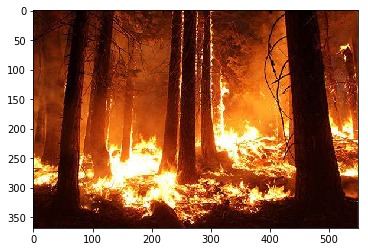

In [2]:
# Get the classification of a sample image
from api_vision.api_mgt import get_msvision_classif

img_sample_path = os.path.join('static', 'images', 'wildfire.jpg')

img = mpimg.imread(img_sample_path)
imgplot = plt.imshow(img)

with open(img_sample_path, mode="rb") as img:
    starting_time = datetime.now()
    print(get_msvision_classif(img, api_credentials['classification'], classif_setup))
    print('Execution time: %s s' % (datetime.now() - starting_time))

Execution time: 0:00:01.022647 s


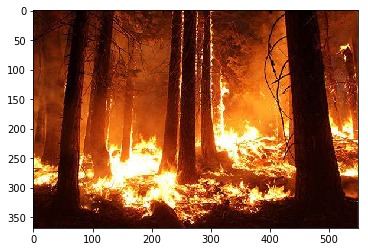

In [3]:
# Get the bounding box of a sample image
from api_vision.api_mgt import get_msvision_objdetection

img = mpimg.imread(img_sample_path)
imgplot = plt.imshow(img)

with open(img_sample_path, mode="rb") as img:
    starting_time = datetime.now()
    pred_boxes, pred_labs, pred_conf = get_msvision_objdetection(img, api_credentials['obj_detection'], obj_detec_setup)
    print('Execution time: %s s' % (datetime.now() - starting_time))

['flame (0.493871927)', 'flame (0.507419944)', 'flame (0.371399343)', 'flame (0.271383464)', 'smoke (0.3969854)']


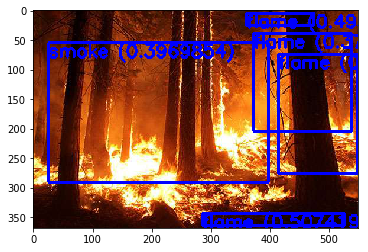

In [4]:
# Plot the results
img = cv2.imread(img_sample_path)
from utils.graphics_lib import add_boxes
labs = ['%s (%s)' % (lab, pred_conf[idx]) for idx, lab in enumerate(pred_labs)]
print(labs)
img2 = add_boxes(img, pred_boxes, labs, color=(255, 0, 0), label_out=False)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
imgplot2 = plt.imshow(img2)

Execution time: 0:00:00.911588 s
['flame (0.315461725)', 'flame (0.383756)', 'flame (0.201532066)', 'flame (0.42567867)', 'smoke (0.297573745)', 'smoke (0.3629701)']


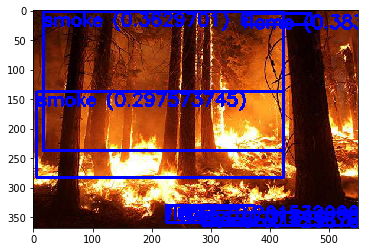

In [5]:
with open(img_sample_path, mode="rb") as img:
    starting_time = datetime.now()
    pred_boxes, pred_labs, pred_conf = get_msvision_objdetection(img, api_credentials['obj_detection'], obj_detec_setup2)
    print('Execution time: %s s' % (datetime.now() - starting_time))

# Plot the results
img_cv = cv2.imread(img_sample_path)
from utils.graphics_lib import add_boxes
labs = ['%s (%s)' % (lab, pred_conf[idx]) for idx, lab in enumerate(pred_labs)]
print(labs)
img3 = add_boxes(img_cv, pred_boxes, labs, color=(255, 0, 0), label_out=False)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
imgplot2 = plt.imshow(img3)

Execution time: 0:00:00.906915 s


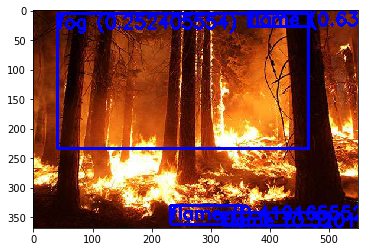

In [12]:
with open(img_sample_path, mode="rb") as img:
    starting_time = datetime.now()
    pred_boxes, pred_labs, pred_conf = get_msvision_objdetection(img, api_credentials['obj_detection'], obj_detec_setup3)
    print('Execution time: %s s' % (datetime.now() - starting_time))

# Plot the results
img_cv = cv2.imread(img_sample_path)
labs = ['%s (%s)' % (lab, pred_conf[idx]) for idx, lab in enumerate(pred_labs)]
img4 = resize_img(img_cv, 1000)
img4 = add_boxes(img_cv, pred_boxes, labs, color=(255, 0, 0), label_out=False)
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
imgplot3 = plt.imshow(img4)

Execution time: 0:00:00.918777 s


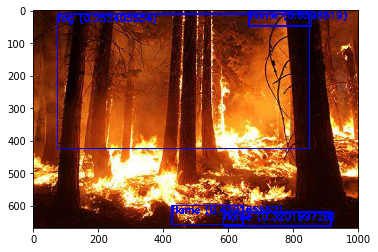

In [4]:
from pipeline.analysis import detect_objects 
with open(img_sample_path, mode="rb") as img:
    starting_time = datetime.now()
    pred_boxes, pred_labs, pred_conf = detect_objects(img, api_credentials['obj_detection'], obj_detec_setup3)
    print('Execution time: %s s' % (datetime.now() - starting_time))

# Plot the results
img_cv = cv2.imread(img_sample_path)
labs = ['%s (%s)' % (lab, pred_conf[idx]) for idx, lab in enumerate(pred_labs)]
img4 = resize_img(img_cv, 1000)
img4 = add_boxes(img4, pred_boxes, labs, color=(255, 0, 0), label_out=False)
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
imgplot3 = plt.imshow(img4)

In [2]:
import os
import cv2
folder_path = os.path.join('static', 'images')
# Prepare
save_path = os.path.join(folder_path, 'outputs')
if not os.path.exists(save_path):
    os.makedirs(save_path)
# List of images
img_list = ['flame_sample01.jpg']
from pipeline.analysis import detect_objects
from utils.graphics_lib import add_boxes, resize_img
for img_name in img_list:
    with open(os.path.join(folder_path, img_name), mode="rb") as img:
        pred_boxes, pred_labs, pred_conf = detect_objects(img, api_credentials['obj_detection'], obj_detec_setup3)
    
    # Plot the results
    img_cv = cv2.imread(os.path.join(folder_path, img_name))
    img_cv = resize_img(img_cv, 1000)
    labs = ['%s (%s)' % (lab, round(pred_conf[idx], 2)) for idx, lab in enumerate(pred_labs)]
    img_cv = add_boxes(img_cv, pred_boxes, labs, color=(255, 0, 0), label_out=False)
    cv2.imwrite(os.path.join(save_path, img_name), img_cv)